# **Load and Clean your Dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load your dataset containing info from the IRT, required for the well-watered conditions

from google.colab import files
uploaded = files.upload()

# Assuming your data is in a CSV file named 'your_data.csv'
df = pd.read_excel('Hourly_data_forColab_1.xlsx')

Saving Hourly_data_forColab_1.xlsx to Hourly_data_forColab_1.xlsx


In [2]:
print(df)

                TIMESTAMP  Hour         Phen_Stage TT_C_2_Avg  \
0     2023-10-06 10:00:00    10  Flowering_Nut_Set      28.68   
1     2023-10-06 11:00:00    11  Flowering_Nut_Set      37.64   
2     2023-10-06 12:00:00    12  Flowering_Nut_Set      31.72   
3     2023-10-06 13:00:00    13  Flowering_Nut_Set      33.02   
4     2023-10-06 14:00:00    14  Flowering_Nut_Set      33.16   
...                   ...   ...                ...        ...   
5347  2024-05-16 10:00:00    10   Shuck_Dehiscence      21.92   
5348  2024-05-16 11:00:00    11   Shuck_Dehiscence      23.94   
5349  2024-05-16 12:00:00    12   Shuck_Dehiscence      25.46   
5350  2024-05-16 13:00:00    13   Shuck_Dehiscence      25.77   
5351  2024-05-16 14:00:00    14   Shuck_Dehiscence      26.57   

      Average Air Temperature (°C)  Average Wind Speed (m/s)  Average RH (%)  \
0                         26.08076                  1.626597        23.38279   
1                         27.70603                  3.31697

In [3]:
# Remove rows with any NaN values
df = df.dropna()

print(df)

                TIMESTAMP  Hour         Phen_Stage TT_C_2_Avg  \
0     2023-10-06 10:00:00    10  Flowering_Nut_Set      28.68   
2     2023-10-06 12:00:00    12  Flowering_Nut_Set      31.72   
3     2023-10-06 13:00:00    13  Flowering_Nut_Set      33.02   
4     2023-10-06 14:00:00    14  Flowering_Nut_Set      33.16   
5     2023-10-06 15:00:00    15  Flowering_Nut_Set      32.72   
...                   ...   ...                ...        ...   
5347  2024-05-16 10:00:00    10   Shuck_Dehiscence      21.92   
5348  2024-05-16 11:00:00    11   Shuck_Dehiscence      23.94   
5349  2024-05-16 12:00:00    12   Shuck_Dehiscence      25.46   
5350  2024-05-16 13:00:00    13   Shuck_Dehiscence      25.77   
5351  2024-05-16 14:00:00    14   Shuck_Dehiscence      26.57   

      Average Air Temperature (°C)  Average Wind Speed (m/s)  Average RH (%)  \
0                         26.08076                  1.626597        23.38279   
2                         29.16127                  2.38068

In [4]:
print(df.dtypes)

TIMESTAMP                        object
Hour                              int64
Phen_Stage                       object
TT_C_2_Avg                       object
Average Air Temperature (°C)    float64
Average Wind Speed (m/s)        float64
Average RH (%)                  float64
Total Rainfall (mm)             float64
Average VPD (kPa)               float64
Rs/Rso                          float64
Tc-Ta                           float64
dtype: object


In [5]:
df['TT_C_2_Avg'] = df['TT_C_2_Avg'].astype(float)
#df['Rs/Rso'] = df['Rs/Rso'].astype(float)
#df['Tc-Ta'] = df['Tc-Ta'].astype(float)
#df['Hour'] = df['Hour'].astype(int)
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
#df['Average Air Temperature (°C)'] = df['Average Air Temperature (°C)'].astype(int)
#df['Average Wind Speed (m/s)'] = df['Average Wind Speed (m/s)'].astype(int)
#df['Average RH (%)'] = df['Average RH (%)'].astype(int)
#df['Total Rainfall (mm)'] = df['Total Rainfall (mm)'].astype(int)
#df['Average VPD (kPa)'] = df['Average VPD (kPa)'].astype(int)

df['Phen_Stage'] = df['Phen_Stage'].astype(str)

In [6]:
print(df.dtypes)

TIMESTAMP                       datetime64[ns]
Hour                                     int64
Phen_Stage                              object
TT_C_2_Avg                             float64
Average Air Temperature (°C)           float64
Average Wind Speed (m/s)               float64
Average RH (%)                         float64
Total Rainfall (mm)                    float64
Average VPD (kPa)                      float64
Rs/Rso                                 float64
Tc-Ta                                  float64
dtype: object


# **Create Well-watered Dataframe, and calculate the NWSB (Tc-Ta)LL**

In [7]:
NWSB_FNS_df = df[(df['Rs/Rso'] > 0.6) & (df['Hour'].between(11, 15)) & (df['Phen_Stage'] == "Flowering_Nut_Set")]

In [8]:
print(NWSB_FNS_df)

               TIMESTAMP  Hour         Phen_Stage  TT_C_2_Avg  \
2    2023-10-06 12:00:00    12  Flowering_Nut_Set       31.72   
3    2023-10-06 13:00:00    13  Flowering_Nut_Set       33.02   
4    2023-10-06 14:00:00    14  Flowering_Nut_Set       33.16   
5    2023-10-06 15:00:00    15  Flowering_Nut_Set       32.72   
25   2023-10-07 11:00:00    11  Flowering_Nut_Set       28.74   
...                  ...   ...                ...         ...   
986  2023-11-16 13:00:00    13  Flowering_Nut_Set       27.53   
987  2023-11-16 14:00:00    14  Flowering_Nut_Set       27.98   
988  2023-11-16 15:00:00    15  Flowering_Nut_Set       28.83   
1011 2023-11-17 14:00:00    14  Flowering_Nut_Set       25.29   
1012 2023-11-17 15:00:00    15  Flowering_Nut_Set       25.29   

      Average Air Temperature (°C)  Average Wind Speed (m/s)  Average RH (%)  \
2                         29.16127                  2.380682        20.14454   
3                         30.55263                  2.38957

In [9]:
# Select Tc - Ta and VPD
X = NWSB_FNS_df['Average VPD (kPa)'].values.reshape(-1, 1)  # Independent variable
y = (NWSB_FNS_df['TT_C_2_Avg'] - NWSB_FNS_df['Average Air Temperature (°C)']).values.reshape(-1, 1) # Dependent variable

In [10]:
# Perform linear regression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [11]:
# Extract coefficients
a = model.coef_[0][0]
b = model.intercept_[0]

print(a)
print(b)

-0.04963687732582405
0.8201556897526698


*As (Tc-Ta)LL = a x VPD + b*

In [12]:
# Calculate NWSB (Tc-Ta)_LL
NWSB_FNS_df.loc[:, 'Tc_Ta_LL'] = a * NWSB_FNS_df['Average VPD (kPa)'] + b

<ipython-input-12-4ad6b1c837f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NWSB_FNS_df.loc[:, 'Tc_Ta_LL'] = a * NWSB_FNS_df['Average VPD (kPa)'] + b


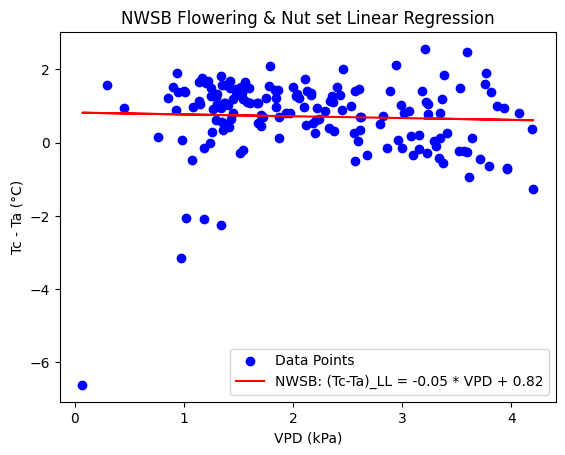

In [13]:
# Visualize the regression
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label=f'NWSB: (Tc-Ta)_LL = {a:.2f} * VPD + {b:.2f}')
plt.xlabel('VPD (kPa)')
plt.ylabel('Tc - Ta (°C)')
plt.legend()
plt.title('NWSB Flowering & Nut set Linear Regression')
plt.show()

# **Calculate the WSB/non-transpiring baseline (Tc-Ta)UL**

*Using Ta + 5*

In [14]:
# Assuming a constant value of 5 degrees Celsius above air temperature, and a constant air temperature of 22 for this day
# Constants
VPD = 1.27  # kPa
Ta = 22.52  # °C

Tc_Ta_UL_1 = Ta + 5

In [ ]:
# Visualize the baseline



*Using (Tc- Ta)UL = aVPG + b, where*

*VPG = 6.1e(17.27 ((Ta + b)/ (Ta + b) + 237.3)) - 6.1e(17.27 (Ta/(Ta + 237.3)) italicized text*

In [15]:
import numpy as np

# Assuming you want to calculate the saturation vapor pressure (VPG) using the formula:
# VPG = 6.1 * 10^((17.27 * Ta) / (Ta + 237.3))

# Correct Python implementation
VPG = 6.1 * np.exp(17.27 * ((Ta + b) / (Ta + b + 237.3))) - 6.1 * np.exp(17.27 * (Ta / (Ta + 237.3)))

# Print the result
print(f"Calculated VPG: {VPG}")

#VPG = 6.1e(17.27 * ((Ta + b) / (Ta + b) + 237.3)) - 6.1e(17.27 * (Ta / (Ta + 237.3)))

Calculated VPG: 1.3867975381256379


In [16]:
Tc_Ta_UL_2 = a * VPG + b

In [17]:
Tc_Ta_UL_2

0.7513193904769727

In [ ]:
# Visualise the baseline



# **Calculate CWSI using Remotely Sensed Temp data, and calculated (Tc-Ta)LL and (Tc-Ta)UL**

*CWSI with (Tc-Ta)LL as aVPD+b & (Tc-Ta)UL as Ta+5*

In [18]:
# Load your dataset containing our thermal data from the RS thermal camera (with info on individual trees)

from google.colab import files
uploaded = files.upload()

# Load your dataset with temperature values for each tree (ensure the Excel sheet is correctly formatted)
# Assuming your data is in a CSV file named 'your_data.csv'
tree_temps_df = pd.read_excel('Tree_level_8Nov.xlsx')

Saving Tree_level_8Nov.xlsx to Tree_level_8Nov.xlsx


In [19]:
print(tree_temps_df)

                                              wkt_geom  fid   id         left  \
0    Polygon ((28.2566062538695526 -25.749439050594...  159  159  626031.7801   
1    Polygon ((28.25721667385957758 -25.74899196683...  316  316  626091.7801   
2    Polygon ((28.25662053871013768 -25.74880030945...  152  152  626031.7801   
3    Polygon ((28.25661541331590598 -25.74889025806...  153  153  626031.7801   
4    Polygon ((28.25680243158734584 -25.74943469031...  213  213  626051.7801   
..                                                 ...  ...  ...          ...   
156  Polygon ((28.25713459927946403 -25.74853638938...  284  284  626081.7801   
157  Polygon ((28.25711581108937409 -25.74890324921...  288  288  626081.7801   
158  Polygon ((28.25732789931782563 -25.74864188597...  339  339  626101.7801   
159  Polygon ((28.25712351035511816 -25.74881279807...  287  287  626081.7801   
160  Polygon ((28.25712256003077982 -25.74871815979...  286  286  626081.7801   

              top        ri

In [20]:
print(tree_temps_df.dtypes)

wkt_geom               object
fid                     int64
id                      int64
left                  float64
top                   float64
right                 float64
bottom                float64
row_index               int64
col_index               int64
NDVI_mean             float64
NDVI_median           float64
Ts_unmasked_mean      float64
Ts_unmasked_median    float64
Ts_unmasked_min       float64
Ts_unmasked_max       float64
NDVI_masked_mean      float64
NDVI_masked_median    float64
Ts_masked_mean        float64
Ts_masked_median      float64
Ts_masked_min           int64
Ts_masked_max         float64
CWSI meth_1           float64
CWSI meth_2           float64
dtype: object


In [21]:
tree_temps_df['fid'] = tree_temps_df['fid'].astype(str)

In [ ]:
# Constants
#VPD = 1.02  # kPa
#Ta = 20.3  # °C

In [22]:
# Calculate Tc_Ta_LL for VPD = 1.27
Tc_Ta_LL = a * VPD + b

In [23]:
# Apply the constant Tc_Ta_LL to all rows
tree_temps_df['Tc_Ta_LL'] = Tc_Ta_LL

In [ ]:
# Apply the constant Tc_Ta_UL_1 to all rows
#tree_temps_df['Tc_Ta_UL_1'] = Tc_Ta_UL_1

In [ ]:
# Apply the constant Tc_Ta_UL_2 to all rows
#tree_temps_df['Tc_Ta_UL_2'] = Tc_Ta_UL_2

In [24]:
# Calculate CWSI for each tree
tree_temps_df['CWSI_1'] = (((tree_temps_df['Ts_unmasked_mean']) - Ta) - Tc_Ta_LL) / (Tc_Ta_UL_1 - Tc_Ta_LL)

In [25]:
print(tree_temps_df['CWSI_1'])

0     -0.262422
1     -0.252947
2     -0.241280
3     -0.230742
4     -0.221043
         ...   
156    0.074462
157    0.075219
158    0.091812
159    0.129006
160    0.136614
Name: CWSI_1, Length: 161, dtype: float64


In [ ]:
# Calculate CWSI for each tree
#tree_temps_df['CWSI_2'] = (((tree_temps_df['Ts_unmasked_mean']) - Ta) - Tc_Ta_LL) / (Tc_Ta_UL_2 - Tc_Ta_LL)

In [ ]:
#print(tree_temps_df['CWSI_2'])

## *CWSI as (Tc-Ta)LL as aVPD+b & (Tc-Ta)UL as aVPG + b*

In [ ]:
# Apply the constant Tc_Ta_UL_2 to all rows
#tree_temps_df['Tc_Ta_UL_2'] = Tc_Ta_UL_2

In [ ]:
# Calculate CWSI for each tree
#tree_temps_df['CWSI_2'] = ((tree_temps_df['Ts_unmaskedmean'] - Ta) - Tc_Ta_LL) / (Tc_Ta_UL_2 - Tc_Ta_LL)

In [ ]:
#print(tree_temps_df['CWSI_2'])

**Theoretical/Analytical approach where Tc measurements are combined with mwteorological data to compute CWSI. Theoretical CWSI is based on equations derived from the combination of Penman-Monteith equation and the energy balance equation (Jackson et al., 1981)**

*where, cP is the heat capacity of air (J kg− 1 ◦C), VPD is the air vapour pressure (Pa), γ is the psychrometric constant (Pa ◦ C− 1), rA is the aerodynamic resistance (s m− 1), rC is the canopy resistance (s m− 1), Δ is the change (slope) of saturation vapour pressure with temperature (Pa ◦C− 1), Rn is the net radiation (J m− 2 s− 1), G is heat flux consumed by soil (J m− 2 s− 1)*

*The aerodynamic resistance rA can be expressed as: rA = [4.72[ln(z - d)/z0]^2]/[1 + 0.54WS]*

*where z is the reference height (m), d is the displacement height (m), d = 0.63 *h, h is the height of crop (m), z0 is the roughness length (m), z0 = 0.13 *h, and WS is the wind speed at height z (m2 s− 1) (Jackson et al., 1981)*

The (Tc -Ta)UL is derived by assuming an infinitely large canopy resistance ( rC ≈ ∞), (Tc- Ta)UL = [rA(Rn- G)]/ρcP

(Tc -Ta)LL is modelled for conditions when rC = rCP (the canopy resistance at full transpiration). According to Jackson et al., (1988, 1981), rCP can be assigned a value of zero or a known rCP value. In this study, rCP = 0 was used

(Tc- Ta)LL = [rA(Rn- G)/ρcP] × [γ/(Δ + γ)] - [VPD/(Δ + γ)]

# **Save & Visualise the Results**

In [26]:
# Save the CWSI values to a new Excel file
tree_temps_df.to_excel('tree_cwsi_values_8Nov23.xlsx', index=False)

print("CWSI calculation complete. The results have been saved to 'tree_cwsi_values.xlsx'.")

CWSI calculation complete. The results have been saved to 'tree_cwsi_values.xlsx'.


# **Calculate the CWSI of each tree using the actual Thermal image, instead of the .csv or .xlsl file**

In [27]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Load the data
data = pd.read_excel('tree_cwsi_values_8Nov23.xlsx')  # or pd.read_csv('thermal_data_with_coordinates.csv')

# Assuming the file contains columns for 'Tree_ID', 'Tc', 'polygon_coords'
# polygon_coords should be a string representation of the polygon coordinates.
# Example: "[(x1,y1), (x2,y2), ...]"

In [28]:
print(data)

                                              wkt_geom  fid   id         left  \
0    Polygon ((28.2566062538695526 -25.749439050594...  159  159  626031.7801   
1    Polygon ((28.25721667385957758 -25.74899196683...  316  316  626091.7801   
2    Polygon ((28.25662053871013768 -25.74880030945...  152  152  626031.7801   
3    Polygon ((28.25661541331590598 -25.74889025806...  153  153  626031.7801   
4    Polygon ((28.25680243158734584 -25.74943469031...  213  213  626051.7801   
..                                                 ...  ...  ...          ...   
156  Polygon ((28.25713459927946403 -25.74853638938...  284  284  626081.7801   
157  Polygon ((28.25711581108937409 -25.74890324921...  288  288  626081.7801   
158  Polygon ((28.25732789931782563 -25.74864188597...  339  339  626101.7801   
159  Polygon ((28.25712351035511816 -25.74881279807...  287  287  626081.7801   
160  Polygon ((28.25712256003077982 -25.74871815979...  286  286  626081.7801   

              top        ri

In [29]:
print(data.dtypes)

wkt_geom               object
fid                     int64
id                      int64
left                  float64
top                   float64
right                 float64
bottom                float64
row_index               int64
col_index               int64
NDVI_mean             float64
NDVI_median           float64
Ts_unmasked_mean      float64
Ts_unmasked_median    float64
Ts_unmasked_min       float64
Ts_unmasked_max       float64
NDVI_masked_mean      float64
NDVI_masked_median    float64
Ts_masked_mean        float64
Ts_masked_median      float64
Ts_masked_min           int64
Ts_masked_max         float64
CWSI meth_1           float64
CWSI meth_2           float64
Tc_Ta_LL              float64
CWSI_1                float64
dtype: object


In [30]:
data['fid'] = data['fid'].astype(str)

In [31]:
pip install shapely

In [32]:
from shapely import wkt
import geopandas as gpd
import pandas as pd

# Sample DataFrame
#data = pd.DataFrame({
#    'wkt_geom': [
#        'Polygon ((28.25674625827907605 -25.74938223072..., ...))',
#        'Polygon ((28.25683929225131408 -25.74939014405..., ...))',
#        # Add other WKT Polygon strings here
#    ]
#})

# Convert WKT string to Shapely Polygon
def wkt_to_polygon(wkt_str):
    try:
        return wkt.loads(wkt_str)
    except Exception as e:
        print(f"Error converting WKT to Polygon: {e}")
        return None

data['geometry'] = data['wkt_geom'].apply(wkt_to_polygon)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry='geometry')

# Optionally, set a coordinate reference system (CRS)
gdf.crs = 'EPSG:4326'  # or use the CRS of your data

# Check the resulting GeoDataFrame
print(gdf.head())


                                            wkt_geom  fid   id         left  \
0  Polygon ((28.2566062538695526 -25.749439050594...  159  159  626031.7801   
1  Polygon ((28.25721667385957758 -25.74899196683...  316  316  626091.7801   
2  Polygon ((28.25662053871013768 -25.74880030945...  152  152  626031.7801   
3  Polygon ((28.25661541331590598 -25.74889025806...  153  153  626031.7801   
4  Polygon ((28.25680243158734584 -25.74943469031...  213  213  626051.7801   

            top        right        bottom  row_index  col_index  NDVI_mean  \
0  7.151455e+06  626041.7801  7.151445e+06         23          5   0.534556   
1  7.151505e+06  626101.7801  7.151495e+06         18         11   0.452680   
2  7.151525e+06  626041.7801  7.151515e+06         16          5   0.591956   
3  7.151515e+06  626041.7801  7.151505e+06         17          5   0.572653   
4  7.151455e+06  626061.7801  7.151445e+06         23          7   0.566705   

   ...  NDVI_masked_median  Ts_masked_mean  Ts_mas

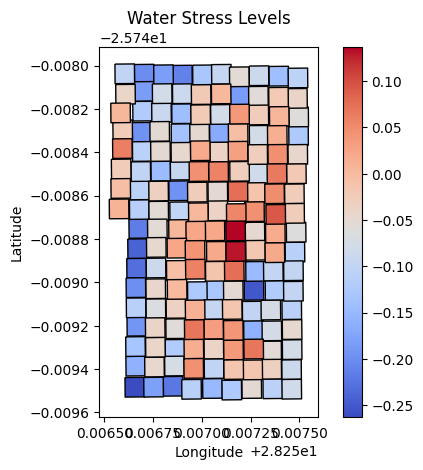

In [33]:
# Once you have the GeoDataFrame with the geometries, you can visualize it as needed:

import matplotlib.pyplot as plt

# Plot the GeoDataFrame
#fig, ax = plt.subplots(figsize=(10, 10))
#fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(column='CWSI_1', cmap='coolwarm', edgecolor='k', legend=True)
plt.title('Water Stress Levels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()